# Interpretation of individual predictions with Local-DIFFI

In this notebook are reproduced the experimental results on the Local-DIFFI method described in our paper [Interpretable Anomaly Detection with DIFFI: Depth-based Feature Importance for the Isolation Forest](https://arxiv.org/pdf/2007.11117.pdf).

The present code represents the very first release of the DIFFI algorithm: the code in this version is not yet optimized.

In [1]:
import os
import numpy as np
import pickle as pkl 
import time
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import shap
import interpretability_module as interp
from utils import *

## "Glass" dataset

### Load data

In [2]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'glass.pkl'), 'rb') as f:
    data = pkl.load(f)
# training data (inliers and outliers)
X_tr = np.concatenate((data['X_in'], data['X_out_5'], data['X_out_6']))
y_tr = np.concatenate((data['y_in'], data['y_out_5'], data['y_out_6']))
X_tr, y_tr = shuffle(X_tr, y_tr, random_state=0)
# test outliers
X_te = data['X_out_7'] 
y_te = data['y_out_7']

### Train the Isolation Forest

In [3]:
iforest = IsolationForest(n_estimators= 100, max_samples=64, contamination='auto', random_state=0, bootstrap=False)
iforest.fit(X_tr)
y_tr_pred = np.array(iforest.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))


F1 score (on training data): 0.552


### Get predictions and interpretations for test outliers
We consider data points in the "headlamps glass" class (class 7 in the original dataset) as test outliers. We compare feature importance scores provided by SHAP with those obtained with Local-DIFFI.

#### Predictions

In [4]:
y_te_pred = np.array(iforest.decision_function(X_te) < 0).astype('int')
print('Detected anomalies (test, class 7): {} out of {}'.format(int(sum(y_te_pred)), len(y_te)))

Detected anomalies (test, class 7): 28 out of 29


#### Local-DIFFI

Average computational time Local-DIFFI: 0.045


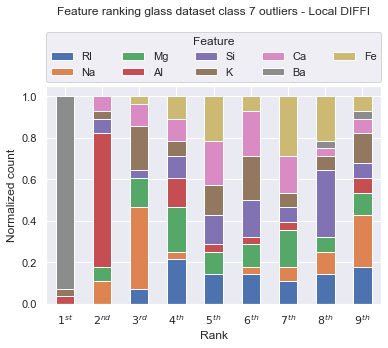

In [5]:
# Local-DIFFI
diffi_te, ord_idx_diffi_te, exec_time_diffi_te = local_diffi_batch(iforest, X_te[np.where(y_te_pred == 1)])
plot_ranking_glass(ord_idx_diffi_te, title = 'Feature ranking glass dataset class 7 outliers - Local DIFFI')
print('Average computational time Local-DIFFI: {}'.format(round(np.mean(exec_time_diffi_te),3)))

#### SHAP

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The sklearn.ensemble.iforest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was 

Average computational time SHAP: 0.318


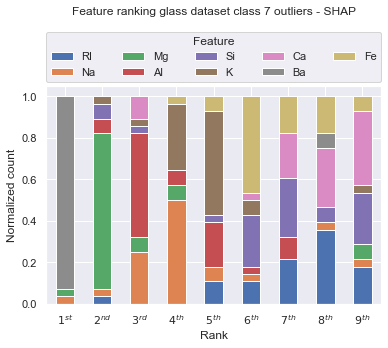

In [6]:
# SHAP
shap_te, ord_idx_shap_te, exec_time_shap_te = local_shap_batch(iforest, X_te[np.where(y_te_pred == 1)])
plot_ranking_glass(ord_idx_shap_te, title = 'Feature ranking glass dataset class 7 outliers - SHAP')
print('Average computational time SHAP: {}'.format(round(np.mean(exec_time_shap_te),3)))

## Synthetic dataset
We consider data points represented by a 6-dimensional feature vector. Features $f_1$ and $f_2$ are the coordinates of the points on the 2-D plane, features $f_3$, $f_4$, $f_5$, $f_6$ are white noise samples. Inliers are concentrated near the origin, while outliers are far away from the origin.

### Load data

In [7]:
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_train.pkl'), 'rb') as f:
    data_tr = pkl.load(f)
with open(os.path.join(os.getcwd(), 'data', 'local', 'syn_test.pkl'), 'rb') as f:
    data_te = pkl.load(f)
# training data (inliers and outliers)
X_tr = data_tr['X']
y_tr = data_tr['y']
# test outliers
X_xaxis = data_te['X_xaxis']
X_yaxis = data_te['X_yaxis']
X_bisec = data_te['X_bisec']

### Train the Isolation Forest

In [8]:
iforest = IsolationForest(n_estimators= 100, max_samples=256, contamination='auto', random_state=0, bootstrap=False)
iforest.fit(X_tr)
y_tr_pred = np.array(iforest.decision_function(X_tr) < 0).astype('int')
f1 = f1_score(y_tr, y_tr_pred)
print('\nF1 score (on training data): {}'.format(round(f1, 3)))


F1 score (on training data): 0.76


### Get predictions and interpretations for test outliers
We consider as test outliers the points displayed in the figure below (projected on the subspace of the relevant features, i.e. $f_1$ and $f_2$). We have:

- outliers on the x-axis (blue points)
- outliers on the y-axis (orange points)
- outliers on the bisector (green points).

We compare feature importance scores provided by SHAP with those obtained with Local-DIFFI.

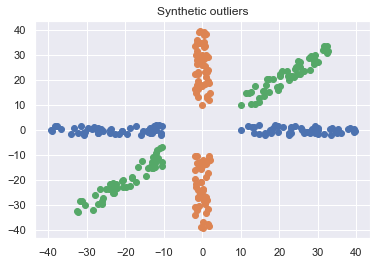

In [9]:
plot_new_outliers_syn(X_xaxis, X_yaxis, X_bisec, 'Synthetic outliers')

#### Predictions - Outliers on the x-axis

In [10]:
y_xaxis_pred = np.array(iforest.decision_function(X_xaxis) < 0).astype('int')
print('Detected anomalies: {} out of {}'.format(int(sum(y_xaxis_pred)), len(y_xaxis_pred)))

Detected anomalies: 64 out of 100


#### Local-DIFFI - Outliers on the x-axis

Average computational time Local-DIFFI: 0.067


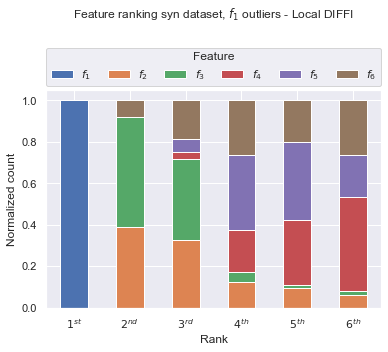

In [11]:
diffi_xaxis, ord_idx_diffi_xaxis, exec_time_diffi_xaxis = local_diffi_batch(iforest, X_xaxis[np.where(y_xaxis_pred == 1)])
plot_ranking_syn(ord_idx_diffi_xaxis, 'Feature ranking syn dataset, ' + r'$f_1$'+ ' outliers - Local DIFFI')
print('Average computational time Local-DIFFI: {}'.format(round(np.mean(exec_time_diffi_xaxis),3)))

#### SHAP - Outliers on the x-axis

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.

Average computational time SHAP: 0.705


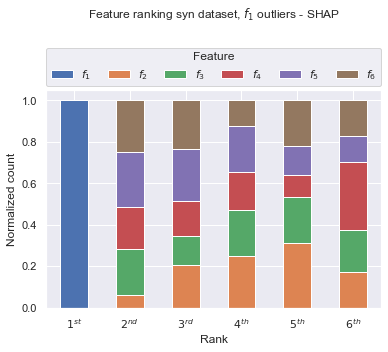

In [12]:
shap_xaxis, ord_idx_shap_xaxis, exec_time_shap_xaxis = local_shap_batch(iforest, X_xaxis[np.where(y_xaxis_pred == 1)])
plot_ranking_syn(ord_idx_shap_xaxis, 'Feature ranking syn dataset, ' + r'$f_1$'+ ' outliers - SHAP')
print('Average computational time SHAP: {}'.format(round(np.mean(exec_time_shap_xaxis),3)))

#### Predictions - Outliers on the y-axis

In [13]:
y_yaxis_pred = np.array(iforest.decision_function(X_yaxis) < 0).astype('int')
print('Detected anomalies: {} out of {}'.format(int(sum(y_yaxis_pred)), len(y_yaxis_pred)))

Detected anomalies: 34 out of 100


#### Local-DIFFI - Outliers on the y-axis

Average computational time Local-DIFFI: 0.068


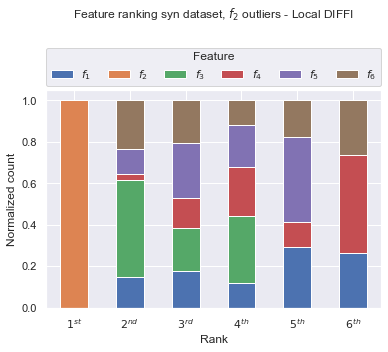

In [14]:
diffi_yaxis, ord_idx_diffi_yaxis, exec_time_diffi_yaxis = local_diffi_batch(iforest, X_yaxis[np.where(y_yaxis_pred == 1)])
plot_ranking_syn(ord_idx_diffi_yaxis, 'Feature ranking syn dataset, ' + r'$f_2$'+ ' outliers - Local DIFFI')
print('Average computational time Local-DIFFI: {}'.format(round(np.mean(exec_time_diffi_yaxis),3)))

#### SHAP - Outliers on the y-axis

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.

Average computational time SHAP: 0.708


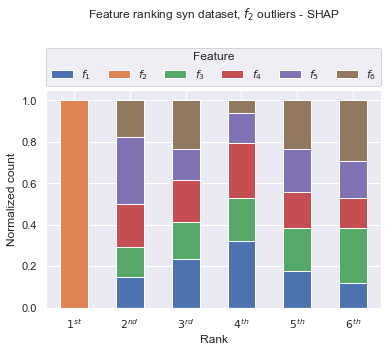

In [15]:
shap_yaxis, ord_idx_shap_yaxis, exec_time_shap_yaxis = local_shap_batch(iforest, X_yaxis[np.where(y_yaxis_pred == 1)])
plot_ranking_syn(ord_idx_shap_yaxis, 'Feature ranking syn dataset, ' + r'$f_2$'+ ' outliers - SHAP')
print('Average computational time SHAP: {}'.format(round(np.mean(exec_time_shap_yaxis),3)))

#### Predictions - Outliers on the bisector

In [16]:
y_bisec_pred = np.array(iforest.decision_function(X_bisec) < 0).astype('int')
print('Detected anomalies: {} out of {}'.format(int(sum(y_bisec_pred)), len(y_bisec_pred)))

Detected anomalies: 94 out of 100


#### Local-DIFFI - Outliers on the bisector

Average computational time Local-DIFFI: 0.068


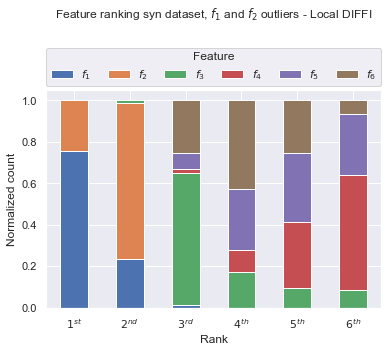

In [17]:
# Local-DIFFI
diffi_bisec, ord_idx_diffi_bisec, exec_time_diffi_bisec = local_diffi_batch(iforest, X_bisec[np.where(y_bisec_pred == 1)])
plot_ranking_syn(ord_idx_diffi_bisec, 'Feature ranking syn dataset, ' + r'$f_1$'+ ' and ' +r'$f_2$'+ ' outliers - Local DIFFI')
print('Average computational time Local-DIFFI: {}'.format(round(np.mean(exec_time_diffi_bisec),3)))

#### SHAP - Outliers on the bisector

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Average computational time SHAP: 0.667


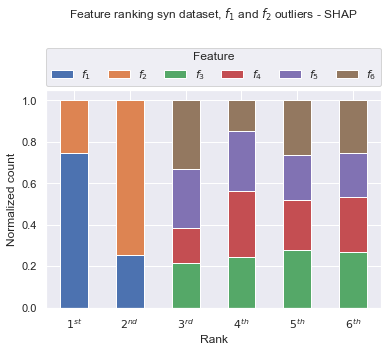

In [18]:
shap_bisec, ord_idx_shap_bisec, exec_time_shap_bisec = local_shap_batch(iforest, X_bisec[np.where(y_bisec_pred == 1)])
plot_ranking_syn(ord_idx_shap_bisec, 'Feature ranking syn dataset, ' + r'$f_1$'+ ' and ' +r'$f_2$'+ ' outliers - SHAP')
print('Average computational time SHAP: {}'.format(round(np.mean(exec_time_shap_bisec),3)))